<a href="https://colab.research.google.com/github/alcarvalhox/inteligencia_vagoes/blob/main/RUL_Vagoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [60]:

raw_data_pat = pd.read_csv('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/hist_variaveis_pat.csv')
raw_data_sem_pat = pd.read_csv('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/hist_variaveis_sem_pat.csv')
raw_data_sem_pat_inst = pd.read_csv('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/hist_variaveis_sem_pat_inst.csv')
raw_data_pat.head()

,DATA_PASSAGEM,VAGAO,EIXO,LADO,VELOCIDADE,FALHA_ROLAMENTO,ERSDB
0,2019-09-23 22:56:00,GDT 728447,4,R,54,RS3,65
1,2019-09-26 05:17:57,GDT 728447,4,R,53,.,60
2,2019-12-16 11:05:09,GDT 728447,4,R,52,.,53
3,2019-12-18 22:54:00,GDT 728447,4,R,49,RS3,59
4,2019-12-21 14:55:30,GDT 728447,4,R,52,.,53


In [62]:
raw_data_sem_pat_inst.head()

,DATA_PASSAGEM,VAGAO,EIXO,LADO,VELOCIDADE,FALHA_ROLAMENTO,ERSDB
0,2020-10-10 23:16:54,733969,4.0,L,52,.,52
1,2020-10-14 06:12:11,733969,4.0,L,51,RS3,59
2,2020-10-20 08:57:51,733969,4.0,L,52,RS3,60
3,2020-10-25 00:56:41,733969,4.0,L,47,.,60
4,2020-10-26 22:47:08,733969,4.0,L,52,.,53


In [7]:
raw_data_pat['ID']= raw_data_pat["VAGAO"]+raw_data_pat["EIXO"].astype(str) + raw_data_pat["LADO"]

In [22]:
raw_data_pat['ID'] = raw_data_pat['ID'].apply(lambda y: y[3:13])

In [15]:
raw_data_sem_pat['EIXO'] = raw_data_sem_pat['EIXO'].astype(int)

In [18]:
raw_data_sem_pat['ID']= raw_data_sem_pat["VAGAO"].astype(str)+raw_data_sem_pat["EIXO"].astype(str) + raw_data_sem_pat["LADO"]

In [24]:
raw_data_pat['TARGET']=1
raw_data_sem_pat['TARGET']=0

In [66]:
raw_data_sem_pat_inst.dtypes

DATA_PASSAGEM      object
VAGAO               int64
EIXO                int64
LADO               object
VELOCIDADE          int64
FALHA_ROLAMENTO    object
ERSDB               int64
dtype: object

In [64]:
raw_data_sem_pat_inst['EIXO'] = raw_data_sem_pat_inst['EIXO'].astype(int)

In [67]:
raw_data_sem_pat_inst['ID']= raw_data_sem_pat_inst["VAGAO"].astype(str)+raw_data_sem_pat_inst["EIXO"].astype(str) + raw_data_sem_pat_inst["LADO"]

In [68]:
raw_data_sem_pat_inst.head()

,DATA_PASSAGEM,VAGAO,EIXO,LADO,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,ID
0,2020-10-10 23:16:54,733969,4,L,52,.,52,7339694L
1,2020-10-14 06:12:11,733969,4,L,51,RS3,59,7339694L
2,2020-10-20 08:57:51,733969,4,L,52,RS3,60,7339694L
3,2020-10-25 00:56:41,733969,4,L,47,.,60,7339694L
4,2020-10-26 22:47:08,733969,4,L,52,.,53,7339694L


In [26]:
raw_data = pd.concat([raw_data_pat,raw_data_sem_pat],axis = 0)
raw_data

,DATA_PASSAGEM,VAGAO,EIXO,LADO,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,ID,TARGET
0,2019-09-23 22:56:00,GDT 728447,4,R,54,RS3,65,7284474R,1
1,2019-09-26 05:17:57,GDT 728447,4,R,53,.,60,7284474R,1
2,2019-12-16 11:05:09,GDT 728447,4,R,52,.,53,7284474R,1
3,2019-12-18 22:54:00,GDT 728447,4,R,49,RS3,59,7284474R,1
4,2019-12-21 14:55:30,GDT 728447,4,R,52,.,53,7284474R,1
...,...,...,...,...,...,...,...,...,...
44755,2019-01-21 01:47:43,730147,1,L,56,RS3,61,7301471L,0
44756,2019-01-24 02:19:03,730147,1,L,55,RS3,62,7301471L,0
44757,2019-02-17 10:52:22,730147,1,L,46,.,59,7301471L,0
44758,2019-02-20 09:40:12,730147,1,L,55,.,65,7301471L,0


In [69]:
raw_data_sem_pat_inst = raw_data_sem_pat_inst.drop(['VAGAO', 'EIXO','LADO'], axis=1)
raw_data_sem_pat_inst

,DATA_PASSAGEM,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,ID
0,2020-10-10 23:16:54,52,.,52,7339694L
1,2020-10-14 06:12:11,51,RS3,59,7339694L
2,2020-10-20 08:57:51,52,RS3,60,7339694L
3,2020-10-25 00:56:41,47,.,60,7339694L
4,2020-10-26 22:47:08,52,.,53,7339694L
...,...,...,...,...,...
835890,2022-06-16 16:55:53,55,.,56,7342674R
835891,2022-06-19 11:57:37,50,.,53,7342674R
835892,2022-06-22 14:23:48,54,.,52,7342674R
835893,2022-06-25 18:11:51,53,.,52,7342674R


In [27]:
raw_data = raw_data.drop(['VAGAO', 'EIXO','LADO'], axis=1)
raw_data

,DATA_PASSAGEM,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,ID,TARGET
0,2019-09-23 22:56:00,54,RS3,65,7284474R,1
1,2019-09-26 05:17:57,53,.,60,7284474R,1
2,2019-12-16 11:05:09,52,.,53,7284474R,1
3,2019-12-18 22:54:00,49,RS3,59,7284474R,1
4,2019-12-21 14:55:30,52,.,53,7284474R,1
...,...,...,...,...,...,...
44755,2019-01-21 01:47:43,56,RS3,61,7301471L,0
44756,2019-01-24 02:19:03,55,RS3,62,7301471L,0
44757,2019-02-17 10:52:22,46,.,59,7301471L,0
44758,2019-02-20 09:40:12,55,.,65,7301471L,0


In [70]:
raw_data_sem_pat_inst['Cycle'] = 0

In [28]:
raw_data['Cycle']=0

In [72]:
id_inst = raw_data_sem_pat_inst.drop_duplicates(subset=['ID'])
list_id_inst = id_inst['ID'].tolist()

In [29]:
id = raw_data.drop_duplicates(subset=['ID'])
list_id = id['ID'].tolist()

In [73]:
COLUNAS_inst = raw_data_sem_pat_inst.columns

In [44]:
COLUNAS = raw_data.columns

In [74]:
raw_data_1 = pd.DataFrame(columns=COLUNAS_inst)

for ids in list_id_inst:
  raw_filter = raw_data_sem_pat_inst[(raw_data_sem_pat_inst['ID']== ids)]
  raw_filter = raw_filter.reset_index(drop=True)
  cont=1
  for x in range (len(raw_filter)):
    #if raw_filter.iloc[x]['ID'] == ids:
    raw_filter.at[x, 'Cycle'] = cont
      #raw_data.iloc[x]['Cycle'] = cont
    cont+=1
  raw_data_final_inst = pd.concat([raw_data_1,raw_filter],axis = 0)
  raw_data_1 = raw_data_final_inst

In [75]:
raw_data_final_inst

,DATA_PASSAGEM,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,ID,Cycle
0,2020-10-10 23:16:54,52,.,52,7339694L,1
1,2020-10-14 06:12:11,51,RS3,59,7339694L,2
2,2020-10-20 08:57:51,52,RS3,60,7339694L,3
3,2020-10-25 00:56:41,47,.,60,7339694L,4
4,2020-10-26 22:47:08,52,.,53,7339694L,5
...,...,...,...,...,...,...
101,2022-06-16 16:55:53,55,.,56,7342674R,102
102,2022-06-19 11:57:37,50,.,53,7342674R,103
103,2022-06-22 14:23:48,54,.,52,7342674R,104
104,2022-06-25 18:11:51,53,.,52,7342674R,105


In [76]:
le = LabelEncoder()
raw_data_final_inst.iloc[:,2] = le.fit_transform(raw_data_final_inst.iloc[:,2])
raw_data_final_inst.head()

,DATA_PASSAGEM,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,ID,Cycle
0,2020-10-10 23:16:54,52,0,52,7339694L,1
1,2020-10-14 06:12:11,51,26,59,7339694L,2
2,2020-10-20 08:57:51,52,26,60,7339694L,3
3,2020-10-25 00:56:41,47,0,60,7339694L,4
4,2020-10-26 22:47:08,52,0,53,7339694L,5


In [46]:
raw_data_1 = pd.DataFrame(columns=COLUNAS)

for ids in list_id:
  raw_filter = raw_data[(raw_data['ID']== ids)]
  raw_filter = raw_filter.reset_index(drop=True)
  cont=1
  for x in range (len(raw_filter)):
    #if raw_filter.iloc[x]['ID'] == ids:
    raw_filter.at[x, 'Cycle'] = cont
      #raw_data.iloc[x]['Cycle'] = cont
    cont+=1
  raw_data_final = pd.concat([raw_data_1,raw_filter],axis = 0)
  raw_data_1 = raw_data_final

In [47]:
raw_data_final

,DATA_PASSAGEM,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,ID,TARGET,Cycle
0,2019-09-23 22:56:00,54,RS3,65,7284474R,1,1
1,2019-09-26 05:17:57,53,.,60,7284474R,1,2
2,2019-12-16 11:05:09,52,.,53,7284474R,1,3
3,2019-12-18 22:54:00,49,RS3,59,7284474R,1,4
4,2019-12-21 14:55:30,52,.,53,7284474R,1,5
...,...,...,...,...,...,...,...
125,2019-01-21 01:47:43,56,RS3,61,7301471L,0,126
126,2019-01-24 02:19:03,55,RS3,62,7301471L,0,127
127,2019-02-17 10:52:22,46,.,59,7301471L,0,128
128,2019-02-20 09:40:12,55,.,65,7301471L,0,129


In [51]:
le = LabelEncoder()
raw_data_final.iloc[:,2] = le.fit_transform(raw_data_final.iloc[:,2])
raw_data_final.head()

,DATA_PASSAGEM,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,ID,TARGET,Cycle
0,2019-09-23 22:56:00,54,33,65,7284474R,1,1
1,2019-09-26 05:17:57,53,0,60,7284474R,1,2
2,2019-12-16 11:05:09,52,0,53,7284474R,1,3
3,2019-12-18 22:54:00,49,33,59,7284474R,1,4
4,2019-12-21 14:55:30,52,0,53,7284474R,1,5


In [52]:
raw_data_final.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/raw_data.csv",index = None,header=True)

In [77]:
raw_data_final_inst.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/raw_data_inst.csv",index = None,header=True)

In [53]:
raw_data = raw_data_final

In [54]:
max_cycles_df = raw_data.groupby(['ID'], sort=False)['Cycle'].max().reset_index().rename(columns={'Cycle':'MaxCycleID'})
max_cycles_df.head()

,ID,MaxCycleID
0,7284474R,84
1,7287414L,179
2,7301381L,43
3,7313092R,28
4,7313261L,214


In [55]:
FD001_df = pd.merge(raw_data, max_cycles_df, how='inner', on='ID')
FD001_df['RUL'] = FD001_df['MaxCycleID'] - FD001_df['Cycle']
FD001_df

,DATA_PASSAGEM,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,ID,TARGET,Cycle,MaxCycleID,RUL
0,2019-09-23 22:56:00,54,33,65,7284474R,1,1,84,83
1,2019-09-26 05:17:57,53,0,60,7284474R,1,2,84,82
2,2019-12-16 11:05:09,52,0,53,7284474R,1,3,84,81
3,2019-12-18 22:54:00,49,33,59,7284474R,1,4,84,80
4,2019-12-21 14:55:30,52,0,53,7284474R,1,5,84,79
...,...,...,...,...,...,...,...,...,...
223037,2019-01-21 01:47:43,56,33,61,7301471L,0,126,130,4
223038,2019-01-24 02:19:03,55,33,62,7301471L,0,127,130,3
223039,2019-02-17 10:52:22,46,0,59,7301471L,0,128,130,2
223040,2019-02-20 09:40:12,55,0,65,7301471L,0,129,130,1


In [96]:
FD001_df = FD001_df[FD001_df['MaxCycleID']>100] #.value_counts()

In [97]:
FD001_df['MaxCycleID'].value_counts()

135    2565
179    2506
243    2187
154    2156
141    2115
       ... 
229     229
224     224
208     208
103     206
205     205
Name: MaxCycleID, Length: 241, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


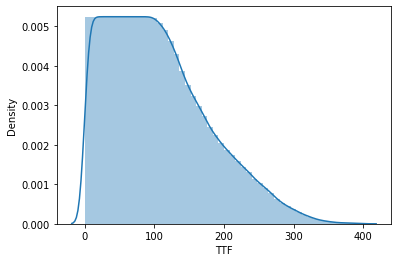

In [98]:
FD001_df['TTF'] = FD001_df['MaxCycleID'] - FD001_df['Cycle']
sns.distplot(FD001_df['TTF'],kde=True)

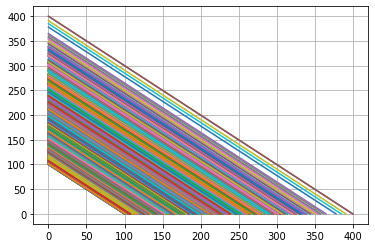

In [99]:
# plot them 
one_engine = []
for i,r in FD001_df.iterrows():
    rul = r['RUL']
    one_engine.append(rul)
    if rul == 0:
        plt.plot(one_engine)
        one_engine = []
        
plt.grid()

In [78]:
FD001_df

,DATA_PASSAGEM,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,ID,TARGET,Cycle,MaxCycleID,RUL,TTF
0,2019-09-23 22:56:00,54,33,65,7284474R,1,1,84,83,83
1,2019-09-26 05:17:57,53,0,60,7284474R,1,2,84,82,82
2,2019-12-16 11:05:09,52,0,53,7284474R,1,3,84,81,81
3,2019-12-18 22:54:00,49,33,59,7284474R,1,4,84,80,80
4,2019-12-21 14:55:30,52,0,53,7284474R,1,5,84,79,79
...,...,...,...,...,...,...,...,...,...,...
223037,2019-01-21 01:47:43,56,33,61,7301471L,0,126,130,4,4
223038,2019-01-24 02:19:03,55,33,62,7301471L,0,127,130,3,3
223039,2019-02-17 10:52:22,46,0,59,7301471L,0,128,130,2,2
223040,2019-02-20 09:40:12,55,0,65,7301471L,0,129,130,1,1


In [86]:
len(list_id)

1386

In [100]:
def fractionTTF(dat,q):
 return(dat.TTF[q]-dat.TTF.min()) / float(dat.TTF.max()-dat.TTF.min())

fTTFz = []
fTTF = []
#for i in range (len(list_id),(len(list_id)+1)): #(train[‘unit’].min(),train[‘unit’].max()+1):
for ids in list_id:  
 dat=FD001_df[FD001_df.ID==ids]
 dat = dat.reset_index(drop=True)
 for q in range(len(dat)):
   fTTFz = fractionTTF(dat, q)
   fTTF.append(fTTFz)


In [103]:
df = pd.DataFrame (fTTF)
df.columns = ['fTTF']
df

,fTTF
0,1.000000
1,0.994382
2,0.988764
3,0.983146
4,0.977528
...,...
207566,0.031008
207567,0.023256
207568,0.015504
207569,0.007752


In [101]:
FD001_df

,DATA_PASSAGEM,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,ID,TARGET,Cycle,MaxCycleID,RUL,TTF
84,2019-01-11 19:56:19,44,0,51,7287414L,1,1,179,178,178
85,2019-01-13 22:57:56,53,0,55,7287414L,1,2,179,177,177
86,2019-01-16 01:31:52,55,0,58,7287414L,1,3,179,176,176
87,2019-01-18 07:21:04,55,0,59,7287414L,1,4,179,175,175
88,2019-01-20 23:55:04,55,0,59,7287414L,1,5,179,174,174
...,...,...,...,...,...,...,...,...,...,...
223037,2019-01-21 01:47:43,56,33,61,7301471L,0,126,130,4,4
223038,2019-01-24 02:19:03,55,33,62,7301471L,0,127,130,3,3
223039,2019-02-17 10:52:22,46,0,59,7301471L,0,128,130,2,2
223040,2019-02-20 09:40:12,55,0,65,7301471L,0,129,130,1,1


In [108]:
FD001_df = FD001_df.reset_index(drop=True)
train = 0
train=pd.concat([FD001_df,df], axis = 1)
train

,DATA_PASSAGEM,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,ID,TARGET,Cycle,MaxCycleID,RUL,TTF,fTTF
0,2019-01-11 19:56:19,44,0,51,7287414L,1,1,179,178,178,1.000000
1,2019-01-13 22:57:56,53,0,55,7287414L,1,2,179,177,177,0.994382
2,2019-01-16 01:31:52,55,0,58,7287414L,1,3,179,176,176,0.988764
3,2019-01-18 07:21:04,55,0,59,7287414L,1,4,179,175,175,0.983146
4,2019-01-20 23:55:04,55,0,59,7287414L,1,5,179,174,174,0.977528
...,...,...,...,...,...,...,...,...,...,...,...
207566,2019-01-21 01:47:43,56,33,61,7301471L,0,126,130,4,4,0.031008
207567,2019-01-24 02:19:03,55,33,62,7301471L,0,127,130,3,3,0.023256
207568,2019-02-17 10:52:22,46,0,59,7301471L,0,128,130,2,2,0.015504
207569,2019-02-20 09:40:12,55,0,65,7301471L,0,129,130,1,1,0.007752


In [109]:
train = train.drop(['DATA_PASSAGEM', 'RUL','TARGET'], axis=1)
train

,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,ID,Cycle,MaxCycleID,TTF,fTTF
0,44,0,51,7287414L,1,179,178,1.000000
1,53,0,55,7287414L,2,179,177,0.994382
2,55,0,58,7287414L,3,179,176,0.988764
3,55,0,59,7287414L,4,179,175,0.983146
4,55,0,59,7287414L,5,179,174,0.977528
...,...,...,...,...,...,...,...,...
207566,56,33,61,7301471L,126,130,4,0.031008
207567,55,33,62,7301471L,127,130,3,0.023256
207568,46,0,59,7301471L,128,130,2,0.015504
207569,55,0,65,7301471L,129,130,1,0.007752


In [110]:
train = train[['ID','Cycle','VELOCIDADE','FALHA_ROLAMENTO','ERSDB','MaxCycleID','TTF','fTTF']]
train

,ID,Cycle,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,MaxCycleID,TTF,fTTF
0,7287414L,1,44,0,51,179,178,1.000000
1,7287414L,2,53,0,55,179,177,0.994382
2,7287414L,3,55,0,58,179,176,0.988764
3,7287414L,4,55,0,59,179,175,0.983146
4,7287414L,5,55,0,59,179,174,0.977528
...,...,...,...,...,...,...,...,...
207566,7301471L,126,56,33,61,130,4,0.031008
207567,7301471L,127,55,33,62,130,3,0.023256
207568,7301471L,128,46,0,59,130,2,0.015504
207569,7301471L,129,55,0,65,130,1,0.007752


In [112]:
X_train = train.values[:,1:5]
X_train

array([[1, 44, 0, 51],
       [2, 53, 0, 55],
       [3, 55, 0, 58],
       ...,
       [128, 46, 0, 59],
       [129, 55, 0, 65],
       [130, 57, 33, 65]], dtype=object)

In [113]:
Y_train = train.values[:, 7]
Y_train

array([1.0, 0.9943820224719101, 0.9887640449438202, ...,
       0.015503875968992248, 0.007751937984496124, 0.0], dtype=object)

In [114]:
raw_data_final_inst

,DATA_PASSAGEM,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,ID,Cycle
0,2020-10-10 23:16:54,52,0,52,7339694L,1
1,2020-10-14 06:12:11,51,26,59,7339694L,2
2,2020-10-20 08:57:51,52,26,60,7339694L,3
3,2020-10-25 00:56:41,47,0,60,7339694L,4
4,2020-10-26 22:47:08,52,0,53,7339694L,5
...,...,...,...,...,...,...
101,2022-06-16 16:55:53,55,0,56,7342674R,102
102,2022-06-19 11:57:37,50,0,53,7342674R,103
103,2022-06-22 14:23:48,54,0,52,7342674R,104
104,2022-06-25 18:11:51,53,0,52,7342674R,105


In [115]:
test = raw_data_final_inst[['ID','Cycle','VELOCIDADE','FALHA_ROLAMENTO','ERSDB']]#,'MaxCycleID','TTF','fTTF']]
test

,ID,Cycle,VELOCIDADE,FALHA_ROLAMENTO,ERSDB
0,7339694L,1,52,0,52
1,7339694L,2,51,26,59
2,7339694L,3,52,26,60
3,7339694L,4,47,0,60
4,7339694L,5,52,0,53
...,...,...,...,...,...
101,7342674R,102,55,0,56
102,7342674R,103,50,0,53
103,7342674R,104,54,0,52
104,7342674R,105,53,0,52


In [116]:
X_test = test.values[:,1:5]
X_test

array([[1, 52, 0, 52],
       [2, 51, 26, 59],
       [3, 52, 26, 60],
       ...,
       [104, 54, 0, 52],
       [105, 53, 0, 52],
       [106, 50, 26, 56]], dtype=object)

In [119]:
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [120]:
score = regressor.predict(X_test)

In [121]:
score[0:10]

array([1.        , 0.99252932, 0.98475414, 0.98452406, 0.97405573,
       0.96493345, 0.95499357, 0.94529533, 0.9358181 , 0.94081759])

In [122]:
print(score.min(), score.max())

0.001502202872940245 1.0


In [123]:
test1 = pd.merge(test, test.groupby('ID',as_index=False)['Cycle'].max(), how='left', on='ID')
test1.rename(columns={"cycles_x": "Cycle", "cycles_y": "MaxCycleID"}, inplace=True)
test1['score'] = score
test1.head()

,ID,Cycle_x,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,Cycle_y,score
0,7339694L,1,52,0,52,184,1.000000
1,7339694L,2,51,26,59,184,0.992529
2,7339694L,3,52,26,60,184,0.984754
3,7339694L,4,47,0,60,184,0.984524
4,7339694L,5,52,0,53,184,0.974056


In [126]:
def totcycles(data):
 return(data['Cycle_x'] / (1.000001-data['score']))
 
test1['maxpredcycles'] = totcycles(test1)

In [130]:
def RULfunction(data):
 return(data['maxpredcycles'] - data['Cycle_y'])
test1['RUL'] = RULfunction(test1)

In [131]:
test1['RUL'].head()

0    999816.000082
1        83.677576
2        12.761781
3        74.449023
4          8.71334
Name: RUL, dtype: object

In [132]:
test1

,ID,Cycle_x,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,Cycle_y,score,maxpredcycles,RUL
0,7339694L,1,52,0,52,184,1.000000,1000000.000082,999816.000082
1,7339694L,2,51,26,59,184,0.992529,267.677576,83.677576
2,7339694L,3,52,26,60,184,0.984754,196.761781,12.761781
3,7339694L,4,47,0,60,184,0.984524,258.449023,74.449023
4,7339694L,5,52,0,53,184,0.974056,192.71334,8.71334
...,...,...,...,...,...,...,...,...,...
835890,7342674R,102,55,0,56,106,0.370969,162.153912,56.153912
835891,7342674R,103,50,0,53,106,0.445826,185.861961,79.861961
835892,7342674R,104,54,0,52,106,0.423349,180.351285,74.351285
835893,7342674R,105,53,0,52,106,0.477367,200.905312,94.905312


In [139]:
len(list_id_inst)

7682

In [138]:
len(predictedRUL)

7682

In [175]:
rolamento = pd.DataFrame(list_id_inst,columns=['Rolamento'])
rul = pd.DataFrame(predictedRUL,columns=['RUL Previsto'])
resultado= pd.concat([rolamento,rul],axis=1)

In [176]:
resultado

,Rolamento,RUL Previsto
0,7339694L,87.710742
1,7339693L,73.260665
2,7339692L,5.581622
3,7339691L,115.283333
4,7339694R,69.334574
...,...,...
7677,7342674L,73.917081
7678,7342671R,165.391848
7679,7342672R,64.756549
7680,7342673R,84.609322


In [182]:
resultado['RUL Previsto'] = resultado['RUL Previsto'].apply(lambda y: int(round(y,0)))
resultado

,Rolamento,RUL Previsto
0,7339694L,88
1,7339693L,73
2,7339692L,6
3,7339691L,115
4,7339694R,69
...,...,...
7677,7342674L,74
7678,7342671R,165
7679,7342672R,65
7680,7342673R,85


In [183]:
train

,ID,Cycle,VELOCIDADE,FALHA_ROLAMENTO,ERSDB,MaxCycleID,TTF,fTTF
0,7287414L,1,44,0,51,179,178,1.000000
1,7287414L,2,53,0,55,179,177,0.994382
2,7287414L,3,55,0,58,179,176,0.988764
3,7287414L,4,55,0,59,179,175,0.983146
4,7287414L,5,55,0,59,179,174,0.977528
...,...,...,...,...,...,...,...,...
207566,7301471L,126,56,33,61,130,4,0.031008
207567,7301471L,127,55,33,62,130,3,0.023256
207568,7301471L,128,46,0,59,130,2,0.015504
207569,7301471L,129,55,0,65,130,1,0.007752


In [177]:
t = train.columns == 'RUL'
ind = [i for i, x in enumerate(t) if x]
predictedRUL = []
#for i in range(test.unit.min(), test.unit.max()+1):
for ids in list_id_inst:
 npredictedRUL=test1[test1.ID==ids].iloc[test1[test1.ID==ids].Cycle_x.max()-1,ind]
 predictedRUL.append(npredictedRUL)

In [180]:
predictedRUL

[Series([], Name: 183, dtype: object),
 Series([], Name: 367, dtype: object),
 Series([], Name: 551, dtype: object),
 Series([], Name: 575, dtype: object),
 Series([], Name: 759, dtype: object),
 Series([], Name: 943, dtype: object),
 Series([], Name: 1127, dtype: object),
 Series([], Name: 1151, dtype: object),
 Series([], Name: 1275, dtype: object),
 Series([], Name: 1399, dtype: object),
 Series([], Name: 1523, dtype: object),
 Series([], Name: 1647, dtype: object),
 Series([], Name: 1771, dtype: object),
 Series([], Name: 1895, dtype: object),
 Series([], Name: 2019, dtype: object),
 Series([], Name: 2143, dtype: object),
 Series([], Name: 2267, dtype: object),
 Series([], Name: 2391, dtype: object),
 Series([], Name: 2515, dtype: object),
 Series([], Name: 2639, dtype: object),
 Series([], Name: 2763, dtype: object),
 Series([], Name: 2887, dtype: object),
 Series([], Name: 3011, dtype: object),
 Series([], Name: 3135, dtype: object),
 Series([], Name: 3233, dtype: object),
 Serie

In [179]:
#predictedRUL=[float(i) for i in predictedRUL]
xtrueRUL = list(RUL['RUL'])
otrueRUL = []
for i in range(0,len(xtrueRUL)):
 otrueRUL = np.concatenate((otrueRUL,list(reversed(np.arange(int(xtrueRUL[i]))))))
xpredictedRUL = list(round(x) for x  in predictedRUL)



KeyboardInterrupt: ignored

In [163]:
opredictedRUL = []
for i in range(0,len(xpredictedRUL)):
    opredictedRUL = np.concatenate((opredictedRUL,list(reversed(np.arange(xpredictedRUL[i])))))
xpredictedRUL1= []
for i in range(0,len(xpredictedRUL)):
    xpredictedRUL1.append(int(xpredictedRUL[i]))  
xpredictedRUL2 = np.array(xpredictedRUL1)

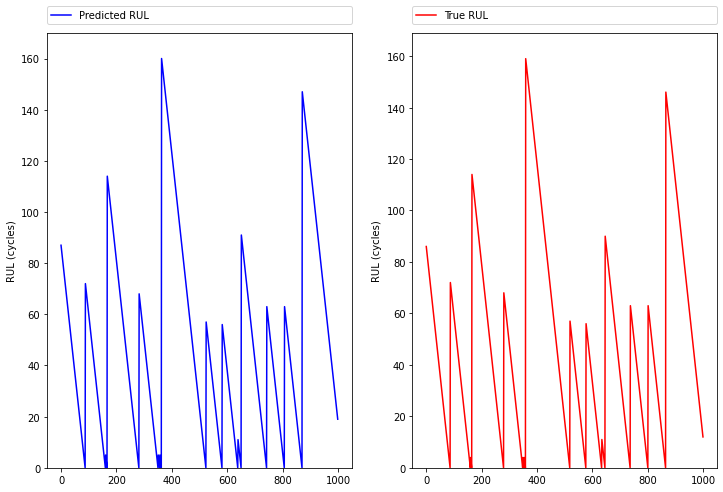

In [165]:
mx = 1000
fig = plt.figure(figsize = (12, 8))
fig.add_subplot(1,2,1)
plt.plot(opredictedRUL[0:mx], color='blue')
plt.legend(['Predicted RUL'], bbox_to_anchor=(0., 1.02, 1., .102),loc=3, mode='expand', borderaxespad=0)
plt.ylim(0, opredictedRUL[0:mx].max()+10)
plt.ylabel('RUL (cycles)')
fig.add_subplot(1,2,2)
plt.plot(otrueRUL[0:mx], color='red')
plt.legend(['True RUL'], bbox_to_anchor=(0., 1.02, 1., .102),
 loc=3, mode='expand', borderaxespad=0)
plt.ylabel('RUL (cycles)')
plt.ylim(0,otrueRUL[0:mx].max()+10)
plt.show()

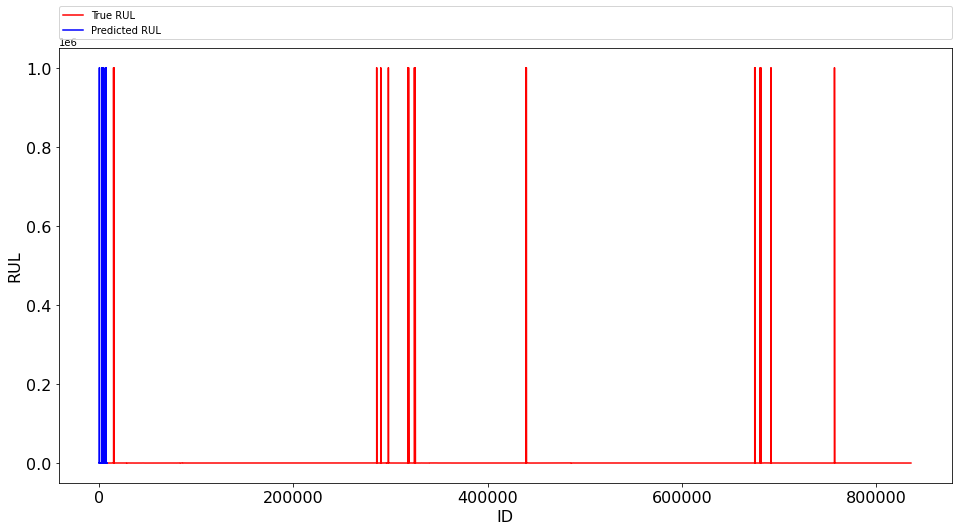

In [166]:
plt.figure(figsize = (16, 8))
plt.plot(RUL, color='red')
plt.plot(predictedRUL, color='blue')
plt.xlabel('ID', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('RUL', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['True RUL','Predicted RUL'], bbox_to_anchor=(0., 1.02, 1., .102),loc=3, mode='expand', borderaxespad=0)
plt.show()

In [167]:
df1 = pd.concat([pd.Series(RUL['RUL']), pd.Series(xpredictedRUL2)], axis=1)
df1.columns = ['true', 'predicted']

In [171]:
xpredictedRUL2 = pd.DataFrame(xpredictedRUL2,columns=['predict'])
xpredictedRUL2

,predict
0,88
1,73
2,6
3,115
4,69
...,...
7677,74
7678,165
7679,65
7680,85


In [172]:
RUL = RUL.reset_index(drop=True)
RUL

,RUL
0,87.710742
1,73.260665
2,5.581622
3,115.283333
4,69.334574
...,...
7677,73.917081
7678,165.391848
7679,64.756549
7680,84.609322


In [173]:
rel = pd.concat([RUL,xpredictedRUL2],axis=1)

In [174]:
rel['diff'] = rel['predict']-rel['RUL']
rel.head()

,RUL,predict,diff
0,87.710742,88,0.289258
1,73.260665,73,-0.260665
2,5.581622,6,0.418378
3,115.283333,115,-0.283333
4,69.334574,69,-0.334574


In [ ]:
ntrain[‘fTTF’] = fTTFmx = cyclestrain.iloc[0:4,1].sum()fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(ntrain.TTF[0:mx])
plt.legend(['Time to failure (in cycles)'], bbox_to_anchor=(0., 1.02, 1., .102),
           loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original unit')
fig.add_subplot(1,2,2)
plt.plot(ntrain.fTTF[0:mx])
plt.legend(['Time to failure (fraction)'], bbox_to_anchor=(0., 1.02, 1., .102),
           loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled unit')
plt.show()